## 1. Data Preparation

Installing the packages that are suitable for the analyzed sentiments

In [1]:
#pip install wordcloud
#pip install textblob
#!pip install emoji==2.2.0 ## 2.2.0 is a most stable version till date , hence installing this version makes sense !

In [2]:
import os
#Progesss the data, and visulization package
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime, nltk, warnings
from IPython.display import display, HTML
import plotly.graph_objs as go
from plotly.offline import iplot
import string

#Analyze the sentiments
from textblob import TextBlob#a NLP library built on top of NLTK
from wordcloud import WordCloud , STOPWORDS

#Analyze the emotion in the string
import emoji

In [3]:
#For later version of pandas, use the "on_bad_lines = 'skip' ", else using error_bad_lines=False)
comments = pd.read_csv('UScomments.csv',on_bad_lines='skip',low_memory=False)

In [4]:
comments.head()#First 5 rows

video_id                                       comment_text likes   
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4  \
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  
0       0  
1       0  
2       0  
3       0  
4       0

In [5]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691400 entries, 0 to 691399
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   video_id      691400 non-null  object
 1   comment_text  691374 non-null  object
 2   likes         691400 non-null  object
 3   replies       691400 non-null  object
dtypes: object(4)
memory usage: 21.1+ MB


In [6]:
## lets find out missing values in your data
comments.isnull().sum()

video_id         0
comment_text    26
likes            0
replies          0
dtype: int64

In [7]:
# Create a DataFrame with null value counts
tab_info = pd.DataFrame(comments.isnull().sum()).T.rename(index={0: 'null values (nb)'})

# Concatenate tab_info and df_null_counts
tab_info = pd.concat([tab_info, pd.DataFrame(comments.isnull().sum()/comments.shape[0]*100).T.
                         rename(index={0:'null values (%)'})])

display(tab_info)

video_id  comment_text  likes  replies
null values (nb)       0.0      26.00000    0.0      0.0
null values (%)        0.0       0.00376    0.0      0.0

In [8]:
##Due to the small null values, we can remove the NaN values from the dataset and update it again.
comments.dropna(inplace=True)

In [9]:
comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

Now the data is cleaned, ready to be analized.

## 2. Analyzing Sentiment Analysis
    
    In short , Sentiment Analysis - analyzing sentiments of Users

In [10]:
#Check how the library TextBlob works
TextBlob("Logan Paul it's yo big day ‼️‼️‼️").sentiment.polarity

### its a neutral sentence ! -> score = 0

0.0

In [11]:
#Check how the library TextBlob works
TextBlob("Wowwww, this placeeee are so gorgeous").sentiment.polarity

### its a positive sentence ! with score is 0.7

0.7

In [12]:
#checking the shape of the dataset
comments.shape

(691374, 4)

In [13]:
#checking the score of all the comments in the dataset, it will take a little bit of time
polarity = []

for comment in comments['comment_text']:
    try:
        polarity.append(TextBlob(comment).sentiment.polarity)
    except:
        polarity.append(0)

In [14]:
len(polarity)

691374

In [15]:
### Inserting polarity values into comments dataframe while defining feature name as "polarity"
comments['polarity']  = polarity

In [16]:
comments.head()

video_id                                       comment_text likes   
0  XpVt6Z1Gjjo                  Logan Paul it's yo big day ‼️‼️‼️     4  \
1  XpVt6Z1Gjjo  I've been following you from the start of your...     3   
2  XpVt6Z1Gjjo                 Say hi to Kong and maverick for me     3   
3  XpVt6Z1Gjjo                                MY FAN . attendance     3   
4  XpVt6Z1Gjjo                                         trending 😉     3   

  replies  polarity  
0       0       0.0  
1       0       0.0  
2       0       0.0  
3       0       0.0  
4       0       0.0

## 3. Wordcloud Analysis

Lets perform Explonatory Data Analyst with Wordcloud

In [17]:
#highly Positve sentences ie Polarity value will be 1 
positive = comments['polarity']==1

In [18]:
comments_positive = comments[positive]

In [19]:
#highly negative sentences ie Polarity value will be -1 
negative = comments['polarity']==-1

In [20]:
comments_negative = comments[negative]

In [21]:
comments_positive.head()

video_id                                       comment_text likes   
64   XpVt6Z1Gjjo                                    yu are the best     1  \
156  cLdxuaxaQwc  Power is the disease.  Care is the cure.  Keep...     0   
227  WYYvHb03Eog  YAS Can't wait to get it! I just need to sell ...     0   
307  sjlHnJvXdQs                                  This is priceless     0   
319  sjlHnJvXdQs                                Summed up perfectly     0   

    replies  polarity  
64        0       1.0  
156       0       1.0  
227       0       1.0  
307       0       1.0  
319       0       1.0

In [22]:
#set(STOPWORDS)

In [23]:
comments['comment_text']

0                         Logan Paul it's yo big day ‼️‼️‼️
1         I've been following you from the start of your...
2                        Say hi to Kong and maverick for me
3                                       MY FAN . attendance
4                                                trending 😉
                                ...                        
691395                                               Лучшая
691396    qu'est ce que j'aimerais que tu viennes à Roan...
691397                            Ven a mexico! 😍 te amo LP
691398                                      Islığı yeter...
691399    Kocham tą piosenkę😍❤❤❤byłam zakochana po uszy ...
Name: comment_text, Length: 691374, dtype: object

In [24]:
type(comments['comment_text'])

pandas.core.series.Series

In [25]:
comments_positive['comment_text']

64                                          yu are the best
156       Power is the disease.  Care is the cure.  Keep...
227       YAS Can't wait to get it! I just need to sell ...
307                                       This is priceless
319                                     Summed up perfectly
                                ...                        
691373                               Perfect. Every version
691383                                    Me encantaaaaa <3
691388                                     Best song ever 🤘
691389                                excellent performance
691393                                                   <3
Name: comment_text, Length: 19390, dtype: object

In [26]:
### for wordcloud , we need to frame our 'comment_text' feature into string ..
total_comments_positive = ' '.join(comments_positive['comment_text'])

In [27]:
wordcloud = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_positive)

(-0.5, 399.5, 199.5, -0.5)

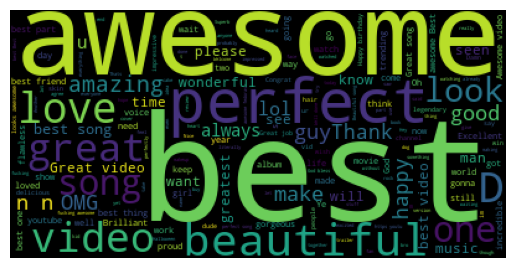

In [28]:
plt.imshow(wordcloud)
plt.axis('off')

Conclusion -> positive Users are emphasizing more on best , awesome , perfect , amazing , look , happy  etc..

In [29]:
total_comments_negative = ' '.join(comments_negative['comment_text'])

In [30]:
wordcloud2 = WordCloud(stopwords=set(STOPWORDS)).generate(total_comments_negative)

(-0.5, 399.5, 199.5, -0.5)

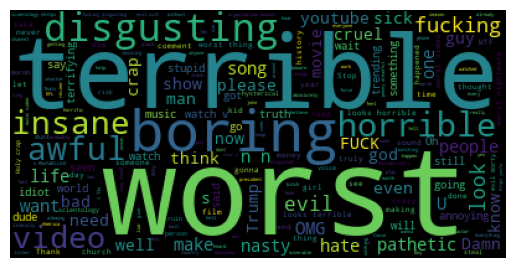

In [31]:
plt.imshow(wordcloud2)
plt.axis('off')

Conclusion-->> Negative Users are emphasizing more on Terrible , worst ,horrible ,boring , disgusting etc..

## 4.. Perform Emoji's Analysis

In [32]:
#Example of the comment combines with the Emoji's
comment = 'trending 😉,🔥'

In [33]:
[char for char in comment if char in emoji.EMOJI_DATA]

['😉', '🔥']

In [34]:
emoji_list = []

for char in comment:
    if char in emoji.EMOJI_DATA:
        emoji_list.append(char)
emoji_list

['😉', '🔥']

In [36]:
all_emojis_list = []

for comment in comments['comment_text'].dropna(): ## in case u have missing values , call dropna()
    for char in comment:
        if char in emoji.EMOJI_DATA:
            all_emojis_list.append(char)

In [37]:
emo_list = pd.DataFrame(all_emojis_list).value_counts().head(10) #-> top 10 emo that used much in the dataset
emo_list.index

MultiIndex([('😂',),
            ('😍',),
            ('❤',),
            ('🔥',),
            ('😭',),
            ('👏',),
            ('😘',),
            ('👍',),
            ('💖',),
            ('💕',)],
           names=[0])

In [38]:
freqs = emo_list.tolist()
freqs

[36987, 33453, 31119, 8694, 8398, 5719, 5545, 5476, 5359, 5147]

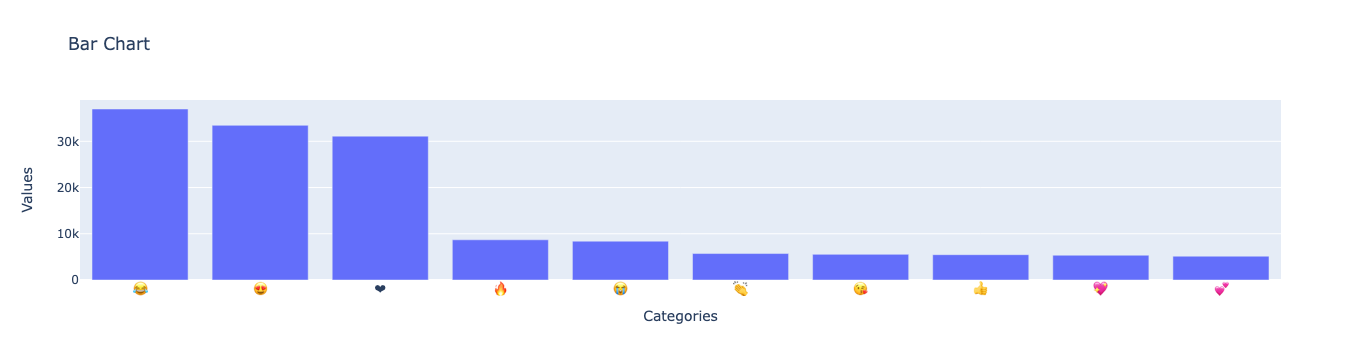

In [39]:
fig = go.Figure(data=go.Bar(x= [index[0] for index in emo_list.index], y=freqs))
fig.update_layout(title='Bar Chart', xaxis_title='Categories', yaxis_title='Values')
fig.show()

Conclusions : Majority of the customers are happy as most of them are using emojis like: funny , love , heart , outstanding..

## 5. Collect Entire data of Youtube in the file dataset.

In [40]:
files= os.listdir('additional_data')

In [41]:
files

['IN_category_id.json',
 'MXvideos.csv',
 'RU_category_id.json',
 'JP_category_id.json',
 'FR_category_id.json',
 'INvideos.csv',
 'GB_category_id.json',
 'DEvideos.csv',
 'JPvideos.csv',
 'KR_category_id.json',
 'KRvideos.csv',
 'CAvideos.csv',
 'MX_category_id.json',
 'RUvideos.csv',
 'FRvideos.csv',
 'CA_category_id.json',
 'US_category_id.json',
 'DE_category_id.json',
 'USvideos.csv',
 'GBvideos.csv']

In [42]:
## extracting csv files only from above list ..

files_csv = [file for file in files if '.csv' in file]

In [43]:
files_csv

['MXvideos.csv',
 'INvideos.csv',
 'DEvideos.csv',
 'JPvideos.csv',
 'KRvideos.csv',
 'CAvideos.csv',
 'RUvideos.csv',
 'FRvideos.csv',
 'USvideos.csv',
 'GBvideos.csv']

In [44]:
full_df = pd.DataFrame()

for file in files_csv:
    current_df = pd.read_csv('additional_data'+'/'+file , encoding='iso-8859-1' , on_bad_lines='skip')
    
    full_df = pd.concat([full_df , current_df] , ignore_index=True)

In [45]:
full_df.shape

(375942, 16)

### 6. Analyse the summarize new dataset

In [46]:
full_df.head()

video_id trending_date   
0  SbOwzAl9ZfQ      17.14.11  \
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   

                                               title   
0                     CapÃ­tulo 12 | MasterChef 2017  \
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

               channel_title  category_id              publish_time   
0            MasterChef 2017           24  2017-11-13T06:06:22.000Z  \
1   Micky Contreras Martinez           22  2017-11-13T05:11:58.000Z   
2  El Pulso De La RepÃºblica           25  2017-11-13T17:00:02.000Z   
3                   Casanare           25  2017-11-13T03:47:10.000Z   
4                      Musas           26  2017-11-13T19:17:48.000Z   

                                                tags   views  likes  dislikes   
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182       361  \
1                                    La Voz Mexico 7  104972    271       174   
2  Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105       266   
3         temblor|"costa rica"|"sismo en costa rica"   96153    378       171   
4  MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...  499965  57781       681   

   comment_count                                  thumbnail_link   
0           1836  https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg  \
1            369  https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg   
2            607  https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg   
3            208  https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg   
4           7428  https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed   
0              False             False                   False  \
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Disfruta la presencia del Chef Torreblanca en ...  
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...  
2  La canciÃ³n del principio se llama âEste esp...  
3  El video es de un Walmart en el pais centroame...  
4  MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...

In [47]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description'],
      dtype='object')

Find duplicated all the rows can be appeared on your system

In [48]:
print('#Duplicate rows: {}'.format(full_df.duplicated().sum()))

#Duplicate rows: 36417


In [49]:
full_df.drop_duplicates(inplace = True)

In [50]:
print('#Duplicate rows: {}'.format(full_df.duplicated().sum()))

#Duplicate rows: 0


In [51]:
full_df.shape

(339525, 16)

In [52]:
full_df['publish_time']

0         2017-11-13T06:06:22.000Z
1         2017-11-13T05:11:58.000Z
2         2017-11-13T17:00:02.000Z
3         2017-11-13T03:47:10.000Z
4         2017-11-13T19:17:48.000Z
                    ...           
375937    2018-05-09T07:00:01.000Z
375938    2018-05-11T17:09:16.000Z
375939    2018-05-08T11:05:08.000Z
375940    2018-05-08T20:32:32.000Z
375941    2018-05-11T04:06:35.000Z
Name: publish_time, Length: 339525, dtype: object

In [53]:
from datetime import datetime
#transfer the time to the normal designed time format
full_df['publish_time'] = pd.to_datetime(full_df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [54]:
full_df.head()

video_id trending_date   
0  SbOwzAl9ZfQ      17.14.11  \
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   

                                               title   
0                     CapÃ­tulo 12 | MasterChef 2017  \
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

               channel_title  category_id        publish_time   
0            MasterChef 2017           24 2017-11-13 06:06:22  \
1   Micky Contreras Martinez           22 2017-11-13 05:11:58   
2  El Pulso De La RepÃºblica           25 2017-11-13 17:00:02   
3                   Casanare           25 2017-11-13 03:47:10   
4                      Musas           26 2017-11-13 19:17:48   

                                                tags   views  likes  dislikes   
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182       361  \
1                                    La Voz Mexico 7  104972    271       174   
2  Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105       266   
3         temblor|"costa rica"|"sismo en costa rica"   96153    378       171   
4  MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...  499965  57781       681   

   comment_count                                  thumbnail_link   
0           1836  https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg  \
1            369  https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg   
2            607  https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg   
3            208  https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg   
4           7428  https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed   
0              False             False                   False  \
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description  
0  Disfruta la presencia del Chef Torreblanca en ...  
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...  
2  La canciÃ³n del principio se llama âEste esp...  
3  El video es de un Walmart en el pais centroame...  
4  MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...

In [55]:
full_df['category_id'].nunique()
#there are 18 category_id

18

In [56]:
#check the start and end time of the dataset
print("Start time: ", full_df['publish_time'].min())
print("  End time: ", full_df['publish_time'].max())

Start time:  2006-07-23 08:24:11
  End time:  2018-06-14 03:40:05


Which Category has the maximum likes ?

In [57]:
#mapping the categories with the categories in the json file

In [58]:
## lets read json file ..
json_df = pd.read_json(r'additional_data/US_category_id.json')

In [59]:
json_df.head()

kind   
0  youtube#videoCategoryListResponse  \
1  youtube#videoCategoryListResponse   
2  youtube#videoCategoryListResponse   
3  youtube#videoCategoryListResponse   
4  youtube#videoCategoryListResponse   

                                                etag   
0  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...  \
1  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
2  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
3  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   
4  "m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJv...   

                                               items  
0  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
1  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
2  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
3  {'kind': 'youtube#videoCategory', 'etag': '"m2...  
4  {'kind': 'youtube#videoCategory', 'etag': '"m2...

In [60]:
json_df['items'][0]

### each row of 'Items' feature is dictionary .. 

{'kind': 'youtube#videoCategory',
 'etag': '"m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
 'id': '1',
 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
  'title': 'Film & Animation',
  'assignable': True}}

In [61]:
cat_dict = {}

for item in json_df['items'].values:
    cat_dict[int(item['id'])] = item['snippet']['title']

In [62]:
full_df['category_name'] = full_df['category_id'].map(cat_dict)

In [63]:
cat_top10 = full_df.groupby('category_name')['likes'].sum().sort_values(ascending = False).nlargest(10)
cat_top10

category_name
Music                   5867826278
Entertainment           2377832055
Comedy                   931444449
People & Blogs           583368312
Film & Animation         437611281
Sports                   330258769
Howto & Style            306753785
Gaming                   251765515
Science & Technology     203111636
News & Politics          142013256
Name: likes, dtype: int64

In [64]:
full_df.head()

video_id trending_date   
0  SbOwzAl9ZfQ      17.14.11  \
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   

                                               title   
0                     CapÃ­tulo 12 | MasterChef 2017  \
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

               channel_title  category_id        publish_time   
0            MasterChef 2017           24 2017-11-13 06:06:22  \
1   Micky Contreras Martinez           22 2017-11-13 05:11:58   
2  El Pulso De La RepÃºblica           25 2017-11-13 17:00:02   
3                   Casanare           25 2017-11-13 03:47:10   
4                      Musas           26 2017-11-13 19:17:48   

                                                tags   views  likes  dislikes   
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182       361  \
1                                    La Voz Mexico 7  104972    271       174   
2  Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105       266   
3         temblor|"costa rica"|"sismo en costa rica"   96153    378       171   
4  MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...  499965  57781       681   

   comment_count                                  thumbnail_link   
0           1836  https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg  \
1            369  https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg   
2            607  https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg   
3            208  https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg   
4           7428  https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed   
0              False             False                   False  \
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description    category_name  
0  Disfruta la presencia del Chef Torreblanca en ...    Entertainment  
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   People & Blogs  
2  La canciÃ³n del principio se llama âEste esp...  News & Politics  
3  El video es de un Walmart en el pais centroame...  News & Politics  
4  MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...    Howto & Style

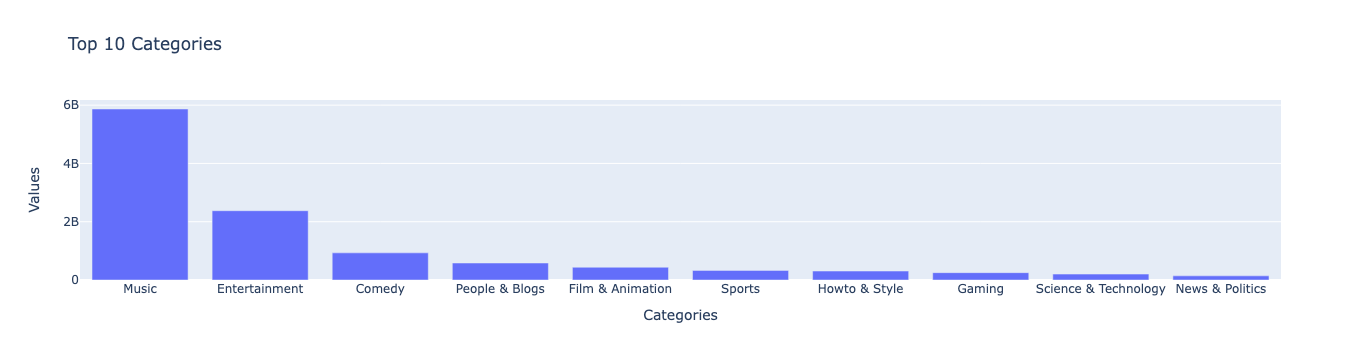

In [65]:
fig_cat = go.Figure(data=go.Bar(x= cat_top10.index.tolist() , y=cat_top10.tolist()))
fig_cat.update_layout(title='Top 10 Categories', xaxis_title='Categories', yaxis_title='Values')
fig_cat.show()

See how the music has developed through last 5 years

In [66]:
full_df['year'] = full_df['publish_time'].dt.year

In [67]:
full_df.head()

video_id trending_date   
0  SbOwzAl9ZfQ      17.14.11  \
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   

                                               title   
0                     CapÃ­tulo 12 | MasterChef 2017  \
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

               channel_title  category_id        publish_time   
0            MasterChef 2017           24 2017-11-13 06:06:22  \
1   Micky Contreras Martinez           22 2017-11-13 05:11:58   
2  El Pulso De La RepÃºblica           25 2017-11-13 17:00:02   
3                   Casanare           25 2017-11-13 03:47:10   
4                      Musas           26 2017-11-13 19:17:48   

                                                tags   views  likes  dislikes   
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182       361  \
1                                    La Voz Mexico 7  104972    271       174   
2  Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105       266   
3         temblor|"costa rica"|"sismo en costa rica"   96153    378       171   
4  MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...  499965  57781       681   

   comment_count                                  thumbnail_link   
0           1836  https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg  \
1            369  https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg   
2            607  https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg   
3            208  https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg   
4           7428  https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg   

   comments_disabled  ratings_disabled  video_error_or_removed   
0              False             False                   False  \
1              False             False                   False   
2              False             False                   False   
3              False             False                   False   
4              False             False                   False   

                                         description    category_name  year  
0  Disfruta la presencia del Chef Torreblanca en ...    Entertainment  2017  
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   People & Blogs  2017  
2  La canciÃ³n del principio se llama âEste esp...  News & Politics  2017  
3  El video es de un Walmart en el pais centroame...  News & Politics  2017  
4  MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...    Howto & Style  2017

In [68]:
print("End year:", full_df['publish_time'].max().year)
last_5years = [full_df['publish_time'].max().year - i for i in range(4,-1,-1)]
last_5years

End year: 2018


[2014, 2015, 2016, 2017, 2018]

In [69]:
filtered_df = full_df[full_df['year'].isin(last_5years)]
result = filtered_df.groupby(['year', 'category_name'])['likes'].sum().sort_index(level = 'year', ascending = True)
filtered_result = result[result.index.get_level_values('category_name') == 'Music']

In [70]:
filtered_result

year  category_name
2014  Music                 41215
2015  Music                 16258
2016  Music                  1956
2017  Music             890181682
2018  Music            4977455406
Name: likes, dtype: int64

In [71]:
#draw the line chart to see the 'likes' through years of Music Category
years = filtered_result.reset_index()['year'].tolist()
likes = filtered_result.reset_index()['likes'].tolist()


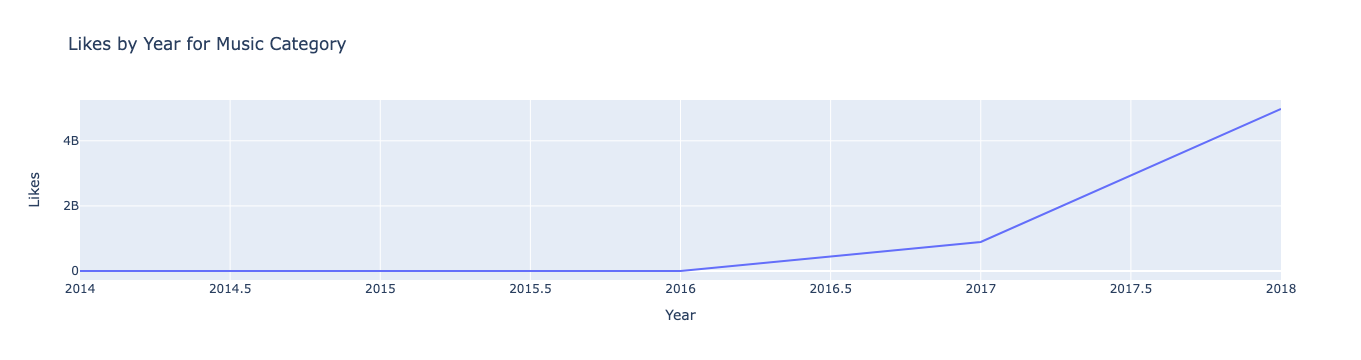

In [72]:
#filtered_result.reset_index()['likes']
import plotly.graph_objects as go
fig_5y = go.Figure(data=go.Scatter(x=years, y=likes, mode='lines'))
fig_5y.update_layout(title='Likes by Year for Music Category', xaxis_title='Year', yaxis_title='Likes',xaxis_tickformat ='.d')
fig_5y.show()

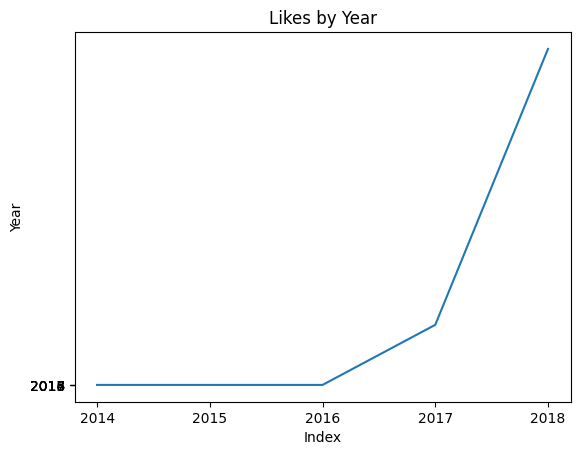

In [73]:
#Example with matplotlib
plt.plot(likes)
plt.xticks(range(len(years)), years)
plt.yticks(years)
plt.title('Likes by Year')
plt.xlabel('Index')
plt.ylabel('Year')
plt.show()

## 7 Find out whether audience is engaged or not

In [75]:
full_df['like_rate'] = (full_df['likes']/full_df['views'])*100
full_df['dislike_rate'] = (full_df['dislikes']/full_df['views'])*100
full_df['comment_count_rate'] = (full_df['comment_count']/full_df['views'])*100

In [76]:
full_df.columns

Index(['video_id', 'trending_date', 'title', 'channel_title', 'category_id',
       'publish_time', 'tags', 'views', 'likes', 'dislikes', 'comment_count',
       'thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description', 'category_name', 'year',
       'like_rate', 'dislike_rate', 'comment_count_rate'],
      dtype='object')

In [77]:
full_df.head()

video_id trending_date   
0  SbOwzAl9ZfQ      17.14.11  \
1  klOV6Xh-DnI      17.14.11   
2  6L2ZF7Qzsbk      17.14.11   
3  hcY52MFWMDM      17.14.11   
4  _OXDcGPVAa4      17.14.11   

                                               title   
0                     CapÃ­tulo 12 | MasterChef 2017  \
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   
2           LOUIS CKAGÃ - EL PULSO DE LA REPÃBLICA   
3   Sismo de 6.7 sacude Costa Rica 12 Noviembre 2017   
4           DOG HACKS | MUSAS LESSLIE LOS POLINESIOS   

               channel_title  category_id        publish_time   
0            MasterChef 2017           24 2017-11-13 06:06:22  \
1   Micky Contreras Martinez           22 2017-11-13 05:11:58   
2  El Pulso De La RepÃºblica           25 2017-11-13 17:00:02   
3                   Casanare           25 2017-11-13 03:47:10   
4                      Musas           26 2017-11-13 19:17:48   

                                                tags   views  likes  dislikes   
0  MasterChef Junior 2017|"TV Azteca"|"recetas"|"...  310130   4182       361  \
1                                    La Voz Mexico 7  104972    271       174   
2  Chumel Torres|"El Pulso de la Republica"|"noti...  136064  10105       266   
3         temblor|"costa rica"|"sismo en costa rica"   96153    378       171   
4  MUSAS|"lesslie"|"karen"|"hacks"|"perros"|"dogs...  499965  57781       681   

   ...                                  thumbnail_link comments_disabled   
0  ...  https://i.ytimg.com/vi/SbOwzAl9ZfQ/default.jpg             False  \
1  ...  https://i.ytimg.com/vi/klOV6Xh-DnI/default.jpg             False   
2  ...  https://i.ytimg.com/vi/6L2ZF7Qzsbk/default.jpg             False   
3  ...  https://i.ytimg.com/vi/hcY52MFWMDM/default.jpg             False   
4  ...  https://i.ytimg.com/vi/_OXDcGPVAa4/default.jpg             False   

   ratings_disabled  video_error_or_removed   
0             False                   False  \
1             False                   False   
2             False                   False   
3             False                   False   
4             False                   False   

                                         description    category_name  year   
0  Disfruta la presencia del Chef Torreblanca en ...    Entertainment  2017  \
1  ALEXA EX-INTEGRANTE DEL GRUPO TIMBIRICHE RENUN...   People & Blogs  2017   
2  La canciÃ³n del principio se llama âEste esp...  News & Politics  2017   
3  El video es de un Walmart en el pais centroame...  News & Politics  2017   
4  MI HERMANO NARRA MI RUTINA DE MAQUILLAJE\nhttp...    Howto & Style  2017   

   like_rate  dislike_rate  comment_count_rate  
0   1.348467      0.116403            0.592010  
1   0.258164      0.165758            0.351522  
2   7.426652      0.195496            0.446114  
3   0.393123      0.177842            0.216322  
4  11.557009      0.136210            1.485704  

[5 rows x 21 columns]

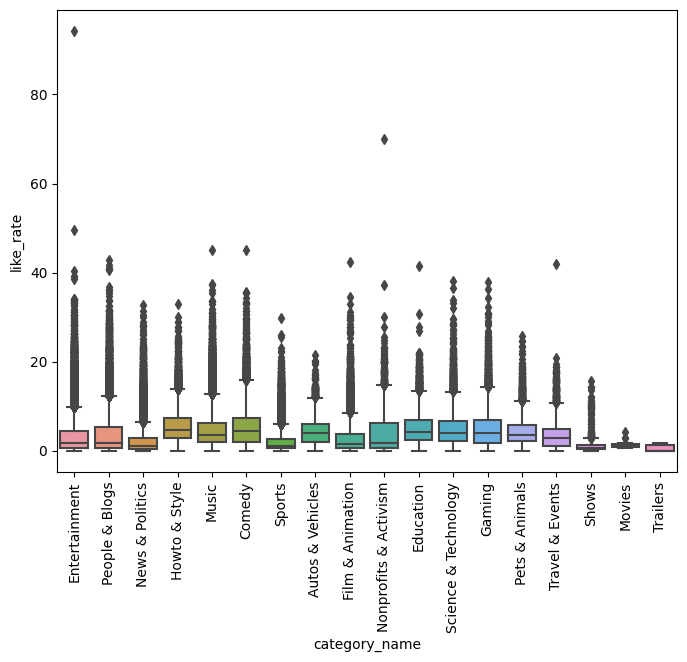

In [78]:
plt.figure(figsize=(8,6))
sns.boxplot(x='category_name' , y='like_rate' , data=full_df)
plt.xticks(rotation='vertical')
plt.show()

Analysing relationship between views & likes

<AxesSubplot: xlabel='views', ylabel='likes'>

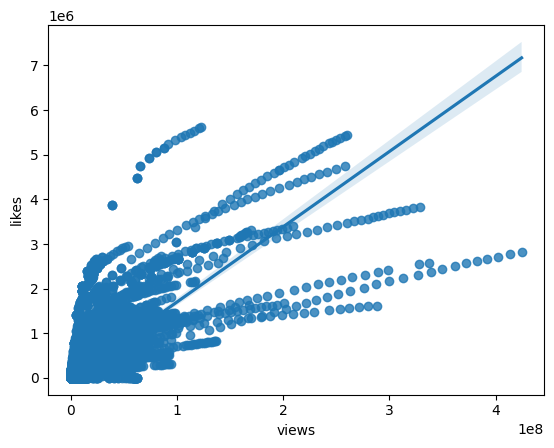

In [79]:
sns.regplot(x='views' , y='likes' , data = full_df)

In [80]:
full_df[['views', 'likes', 'dislikes','comment_count']].corr() ### finding co-relation values between ['views', 'likes', 'dislikes']

views     likes  dislikes  comment_count
views          1.000000  0.779531  0.405428       0.489637
likes          0.779531  1.000000  0.451809       0.763874
dislikes       0.405428  0.451809  1.000000       0.747915
comment_count  0.489637  0.763874  0.747915       1.000000

<AxesSubplot: >

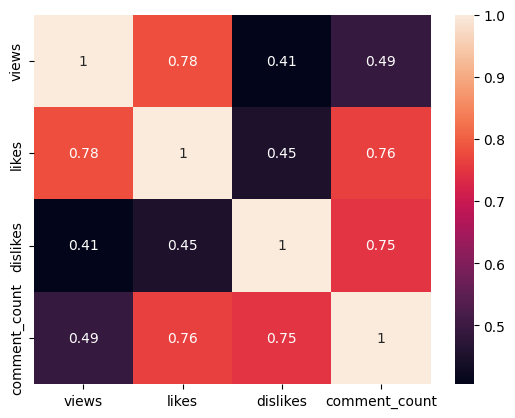

In [81]:
sns.heatmap(full_df[['views', 'likes', 'dislikes','comment_count']].corr() , annot=True)#annot is help you

From this heatmap, we can see that if there are 1000 views, there will have prob to have 780 likes or 410 dislikes.

## 8. Which channels have the largest number of trending videos?

In [82]:
cdf = full_df['channel_title'].value_counts().nlargest(10)

In [83]:
cdf

channel_title
The Late Show with Stephen Colbert        710
WWE                                       643
Late Night with Seth Meyers               592
TheEllenShow                              555
Jimmy Kimmel Live                         528
PewDiePie                                 511
The Tonight Show Starring Jimmy Fallon    509
CNN                                       500
The Late Late Show with James Corden      453
ESPN                                      452
Name: count, dtype: int64

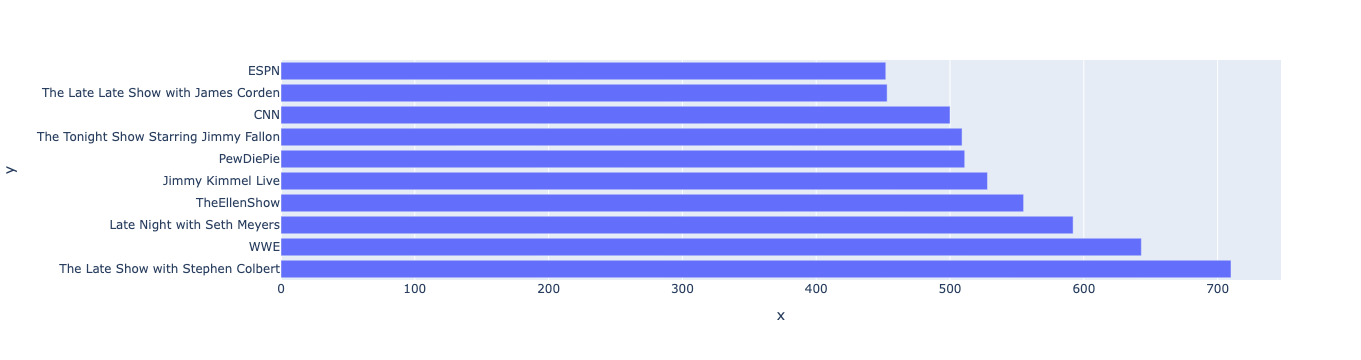

In [85]:
import plotly.express as px
px.bar(data_frame=cdf[0:10] , y=cdf.index.tolist() , x=cdf.tolist(),orientation='h')

## 9. Does Punctuations in title and tags have any relation with views, likes, dislikes comments?

In [86]:
#listing all the punctuation symbol in the string library
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [87]:
#len([char for char in full_df['title'][0] if char in string.punctuation])

In [88]:
def punc_count(text):
    return len([char for char in text if char in string.punctuation])

In [89]:
sample = full_df

In [90]:
sample['count_punc'] = sample['title'].apply(punc_count)

In [91]:
sample['count_punc']

0         1
1         3
2         1
3         1
4         1
         ..
375937    4
375938    3
375939    4
375940    6
375941    5
Name: count_punc, Length: 339525, dtype: int64

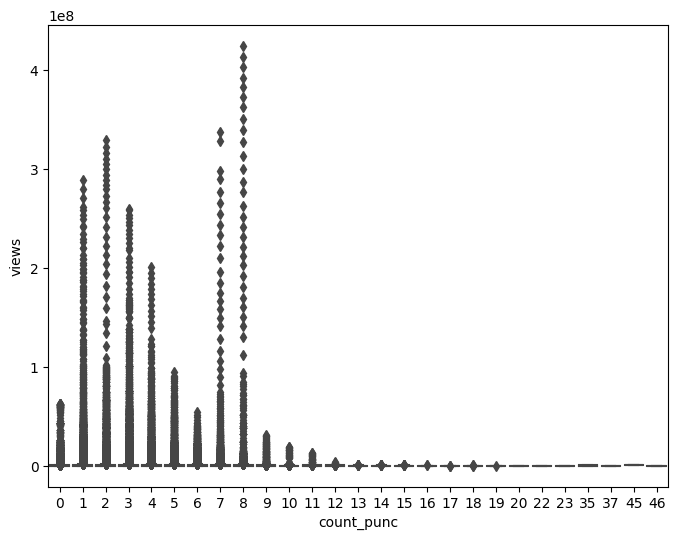

In [92]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc' , y='views' , data=sample)
plt.show()

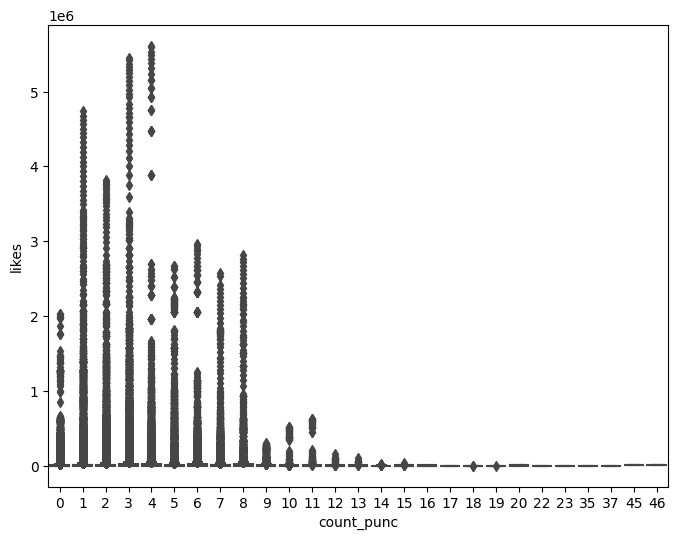

In [93]:
plt.figure(figsize=(8,6))
sns.boxplot(x='count_punc' , y='likes' , data=sample)
plt.show()